In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
# This needs to be 0.0.68 or higher!
pf.__version__

'1.0.11'

## Lets tidy this up for the supplement

In [16]:

read_df2 = pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Supporting_Info\Supporting_information_Draft1.xlsx',
                          sheet_name='Polynomial_Neons')
read_ideal = pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Supporting_Info\Supporting_information_Draft1.xlsx',
                          sheet_name='Ideal_Ne_corr_factors')

# Step 6: Split back and overwrite original variable names
df2_1117_1447 = read_df2[read_df2['line'] == '1117_1447'].reset_index(drop=True)
df2_1220_1310 = read_df2[read_df2['line'] == '1220_1310'].reset_index(drop=True)
df2_1400_1567 = read_df2[read_df2['line'] == '1400_1567'].reset_index(drop=True)

ideal_split_1117_1447 = read_ideal[read_ideal['line'] == '1117_1447'].reset_index(drop=True)
ideal_split_1220_1310 = read_ideal[read_ideal['line'] == '1220_1310'].reset_index(drop=True)
ideal_split_1400_1567 = read_ideal[read_ideal['line'] == '1400_1567'].reset_index(drop=True)


## Define the ideal positions for each one, and then calculate the offset 

In [17]:
## Ideal positions
Ideal_1117=ideal_split_1117_1447['Line_1']
Ideal_1447=ideal_split_1117_1447['Line_2']
Ideal_1220=ideal_split_1220_1310['Line_1']
Ideal_1310=ideal_split_1220_1310['Line_2']
Ideal_1400=ideal_split_1400_1567['Line_1']
Ideal_1567=ideal_split_1400_1567['Line_2']

# Correction factor, defined as Theoretical/Measured line position
Corr_factor_1310=Ideal_1310.values/df2_1220_1310['pk2_peak_cent']
Corr_factor_1220=Ideal_1220.values/df2_1220_1310['pk1_peak_cent']
Corr_factor_1400=Ideal_1400.values/df2_1400_1567['pk1_peak_cent']
Corr_factor_1567=Ideal_1567.values/df2_1400_1567['pk2_peak_cent']
Corr_factor_1447=Ideal_1447.values/df2_1117_1447['pk2_peak_cent']
Corr_factor_1117=Ideal_1117.values/df2_1117_1447['pk1_peak_cent']



In [18]:
# Now lets calculate the uncertainty on these

Corr_factor_1310_err=np.abs(Ideal_1310.values/(df2_1220_1310['pk2_peak_cent']**2))*df2_1220_1310['error_pk2']
Corr_factor_1220_err=np.abs(Ideal_1220.values/(df2_1220_1310['pk1_peak_cent']**2))*df2_1220_1310['error_pk1']
Corr_factor_1400_err=np.abs(Ideal_1400.values/(df2_1400_1567['pk1_peak_cent']**2))*df2_1400_1567['error_pk1']
Corr_factor_1567_err=np.abs(Ideal_1567.values/(df2_1400_1567['pk2_peak_cent']**2))*df2_1400_1567['error_pk2']
Corr_factor_1447_err=np.abs(Ideal_1447.values/(df2_1117_1447['pk2_peak_cent']**2))*df2_1117_1447['error_pk2']
Corr_factor_1117_err=np.abs(Ideal_1117.values/(df2_1117_1447['pk1_peak_cent']**2))*df2_1117_1447['error_pk1']



## Filter out fits which are anomalous

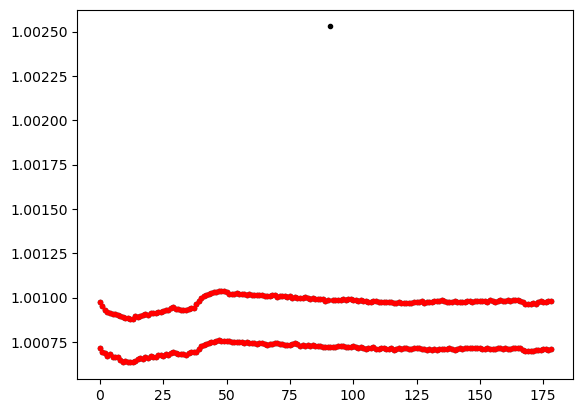

In [19]:


df2_1310_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_factor_1310, number_av=6, offset=0.00009)
plt.plot(df2_1220_1310.index,Corr_factor_1310, '.k')
plt.plot(df2_1310_filt.index, df2_1310_filt, '.r')



df2_1220_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_factor_1220, number_av=6, offset=0.00009)
plt.plot(df2_1220_1310.index,Corr_factor_1220, '.k')
plt.plot(df2_1220_filt.index, df2_1220_filt, '.r')

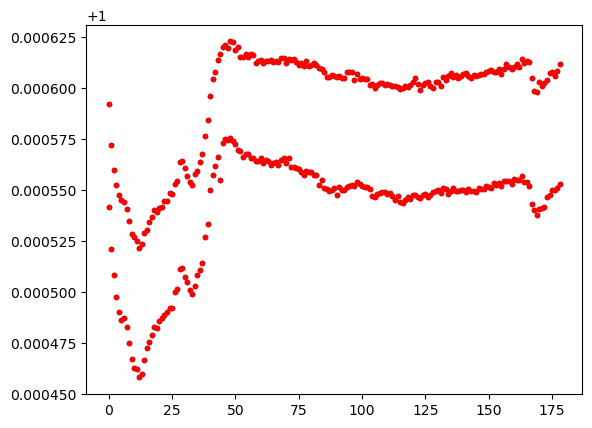

In [20]:


df2_1567_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_factor_1567, number_av=6, offset=0.00009)
plt.plot(df2_1400_1567.index,Corr_factor_1567, '.k')
plt.plot(df2_1567_filt.index, df2_1567_filt, '.r')



df2_1400_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_factor_1400, number_av=6, offset=0.00009)
plt.plot(df2_1400_1567.index,Corr_factor_1400, '.k')
plt.plot(df2_1400_filt.index, df2_1400_filt, '.r')

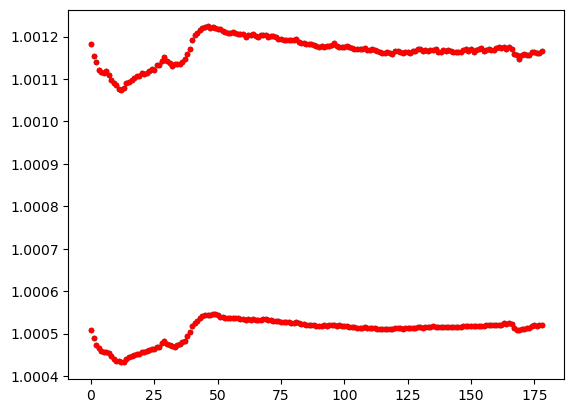

In [21]:


df2_1447_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_factor_1447, number_av=6, offset=0.00009)
plt.plot(df2_1117_1447.index,Corr_factor_1447, '.k')
plt.plot(df2_1447_filt.index, df2_1447_filt, '.r')


df2_1117_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_factor_1117, number_av=6, offset=0.00009)
plt.plot(df2_1117_1447.index,Corr_factor_1117, '.k')
plt.plot(df2_1117_filt.index, df2_1117_filt, '.r')

## Now make a dataframe for easy looping

In [22]:
corr_factor=pd.DataFrame(data={'1117_Corr': df2_1117_filt,
                               '1220_Corr': df2_1220_filt,
                              '1310_Corr': df2_1310_filt,
                            '1400_Corr': df2_1400_filt,
                              '1447_Corr': df2_1447_filt,
                                 '1567_Corr': df2_1567_filt})
sumro=corr_factor.sum(axis=1)
#corr_factor_Filt=corr_factor[(sumro>3.9) & (sumro<4.1)]
corr_factor_Filt=corr_factor #[(sumro>5.9) & (sumro<6.1)]

corr_peaks=pd.DataFrame(data={
'1117_peak':Ideal_1117,
'1220_peak':Ideal_1220,
'1310_peak': Ideal_1310,   
'1400_peak': Ideal_1400,
'1447_peak':Ideal_1447,
'1567_peak': Ideal_1567})
 
corr_factor_with_errs=pd.DataFrame(data={'1117_Corr': Corr_factor_1117,
                               '1220_Corr': Corr_factor_1220,
                              '1310_Corr': Corr_factor_1310,
                            '1400_Corr': Corr_factor_1400,
                              '1447_Corr': Corr_factor_1447,
                                 '1567_Corr': Corr_factor_1567,
                                 '1117_err': Corr_factor_1117_err,
                               '1220_err': Corr_factor_1220_err,
                              '1310_err': Corr_factor_1310_err,
                            '1400_err': Corr_factor_1400_err,
                              '1447_err': Corr_factor_1447_err,
                                 '1567_err': Corr_factor_1567_err})


## Lets load in a diad to have a look at what is happening

In [23]:
import os
DayFolder=os.getcwd()
spectra_path=DayFolder 
ExampleDiad=pf.get_data(path=spectra_path,
        filename='15 MP2_64_FIF_8mW.txt', filetype='headless_txt')

Ne_1400_1567=pf.get_data(path=spectra_path,
        filename='01 Ne_lines_1.txt', filetype='headless_txt')

## Figure 1 a-b

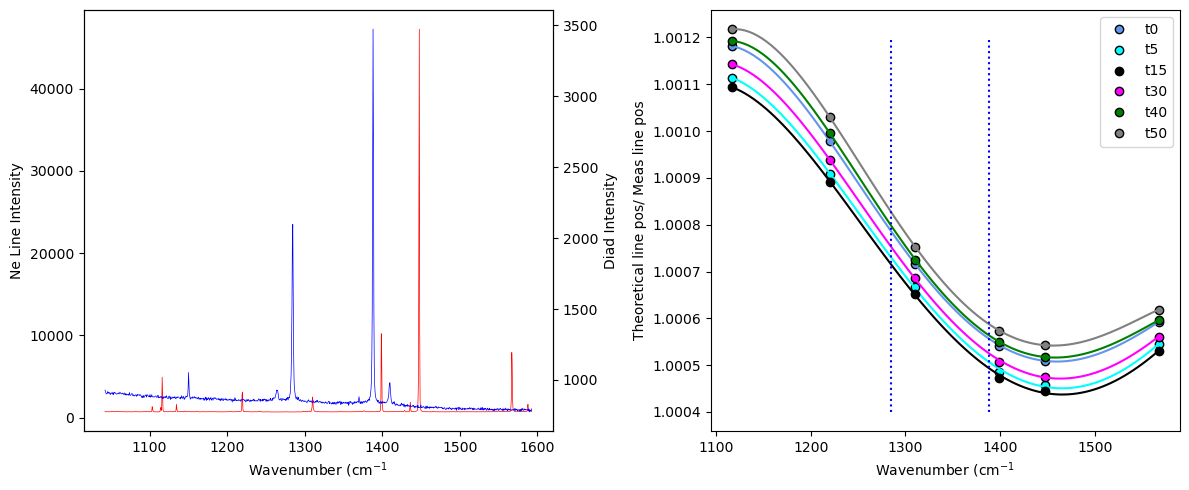

In [24]:
fig, ((ax0, ax1)) = plt.subplots(1,2, figsize = (12,5)) # adjust dimensions of figure here

ax0.plot(Ne_1400_1567[:, 0], Ne_1400_1567[:, 1], '-r', lw=0.5)

ax0b=ax0.twinx()
ax0b.plot(ExampleDiad[:, 0], ExampleDiad[:, 1], '-b', lw=0.5)
# How are the different lines drifting?
color=['red', 'cornflowerblue', 'cyan', 'black', 'magenta', 'green', 'grey']
n=0
diad1_pos=1284.33298631764
diad2_pos=1388.0707023396
ivals=[0, 5, 15, 30, 40, 50]


for i in ivals:
    n=n+1
    text='t'+str(i)
    x=np.array(corr_peaks.iloc[0].values)
    y=corr_factor_Filt.iloc[i].values
    Pf=np.poly1d(np.polyfit(x, y,
                              4))
    Px = np.linspace(1117, 1567, 100)
    Py = Pf(Px)

    ax1.plot(x, y, 'ok', mfc=color[n], label=text)
    ax1.plot(Px, Py, '-', color=color[n])
    ax1.legend()
    
ax1.plot([diad1_pos, diad1_pos], 
         [1.0004, 1.0012], ':b')

ax1.plot([diad2_pos, diad2_pos], 
         [1.0004, 1.0012], ':b')
ax1.ticklabel_format(useOffset=False)
ax0.set_xlabel('Wavenumber (cm$^{-1}$')
ax1.set_xlabel('Wavenumber (cm$^{-1}$')
ax1.set_ylabel('Theoretical line pos/ Meas line pos')
ax0.set_ylabel('Ne Line Intensity')
ax0b.set_ylabel('Diad Intensity')

#ax2.plot(5, 5, 'ok')

fig.tight_layout()
fig.savefig('Bakker_method.png', dpi=200)

## Figure 1 part c

C:\Users\penny\AppData\Local\Temp\ipykernel_64628\3820189830.py:39: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "d" (-> marker='d'). The keyword argument will take precedence.
  ax1.errorbar(corr_peaks.iloc[0].values[0], corr_factor_with_errs['1117_Corr'].iloc[0], xerr=0, yerr=corr_factor_with_errs['1117_err'].iloc[0],
C:\Users\penny\AppData\Local\Temp\ipykernel_64628\3820189830.py:41: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "d" (-> marker='d'). The keyword argument will take precedence.
  ax1.errorbar(corr_peaks.iloc[0].values[1], corr_factor_with_errs['1220_Corr'].iloc[0], xerr=0, yerr=corr_factor_with_errs['1220_err'].iloc[0],
C:\Users\penny\AppData\Local\Temp\ipykernel_64628\3820189830.py:44: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "d" (-> marker='d'). The keyword argument will take precedence.
  ax1.errorbar(corr_peaks.ilo

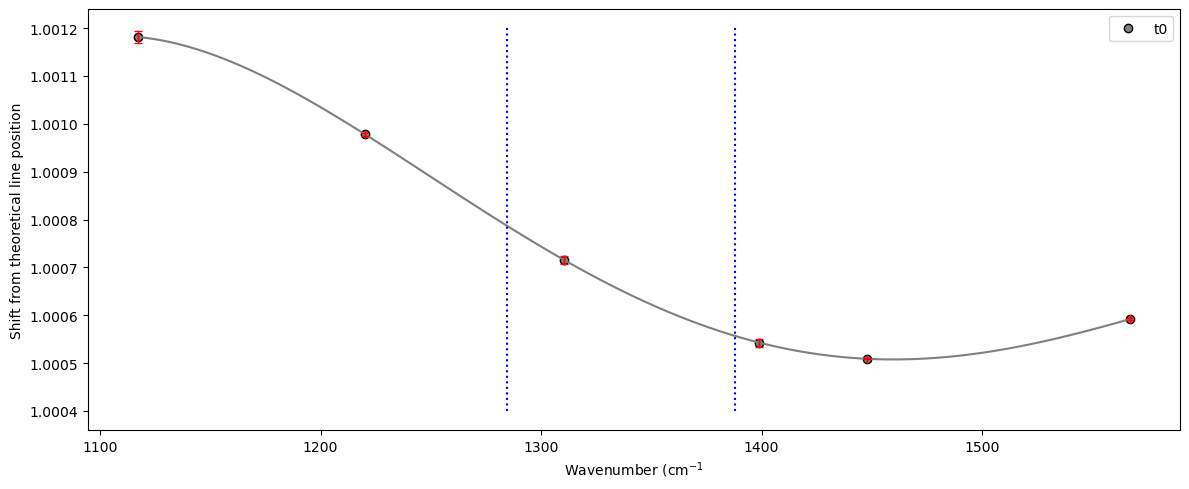

In [25]:
fig, ((ax1)) = plt.subplots(1,1, figsize = (12,5)) # adjust dimensions of figure here
# Where are the Neon lines?

# How are the different lines drifting?
color=['grey']
n=0
diad1_pos=1284.33298631764
diad2_pos=1388.0707023396
ivals=[0,]


   
for i in ivals:
    n=n+1
    text='t'+str(i)
    x=np.array(corr_peaks.iloc[0].values)
    y=corr_factor_Filt.iloc[i].values
    Pf=np.poly1d(np.polyfit(x, y,
                              4))
    Px = np.linspace(1117, 1567, 100)
    Py = Pf(Px)

    ax1.plot(x, y, 'ok', mfc='grey', label=text)
    
    ax1.plot(Px, Py, '-', color='grey')
    ax1.legend()

ax1.plot([diad1_pos, diad1_pos], 
         [1.0004, 1.0012], ':b')

ax1.plot([diad2_pos, diad2_pos], 
         [1.0004, 1.0012], ':b')
ax1.ticklabel_format(useOffset=False)
ax0.set_xlabel('Wavenumber (cm$^{-1}$')
ax1.set_xlabel('Wavenumber (cm$^{-1}$')
ax1.set_ylabel('Shift from theoretical line position')
ax0.set_ylabel('Ne Line Intensity')
ax0b.set_ylabel('Diad Intensity')
ax1.errorbar(corr_peaks.iloc[0].values[0], corr_factor_with_errs['1117_Corr'].iloc[0], xerr=0, yerr=corr_factor_with_errs['1117_err'].iloc[0],
             fmt='d', ecolor='r', elinewidth=0.8, mfc='cyan', marker='None', mec='k', capsize=3)
ax1.errorbar(corr_peaks.iloc[0].values[1], corr_factor_with_errs['1220_Corr'].iloc[0], xerr=0, yerr=corr_factor_with_errs['1220_err'].iloc[0],
             fmt='d', ecolor='r', elinewidth=0.8, mfc='cyan', marker='None', mec='k', capsize=3)

ax1.errorbar(corr_peaks.iloc[0].values[2], corr_factor_with_errs['1310_Corr'].iloc[0], xerr=0, yerr=corr_factor_with_errs['1310_err'].iloc[0],
             fmt='d', ecolor='r', elinewidth=0.8, mfc='cyan', marker='None', mec='k', capsize=3)
ax1.errorbar(corr_peaks.iloc[0].values[3], corr_factor_with_errs['1400_Corr'].iloc[0], xerr=0, yerr=corr_factor_with_errs['1400_err'].iloc[0],
             fmt='d', ecolor='r', elinewidth=0.8, mfc='cyan', marker='None', mec='k', capsize=3)
ax1.errorbar(corr_peaks.iloc[0].values[4], corr_factor_with_errs['1447_Corr'].iloc[0], xerr=0, yerr=corr_factor_with_errs['1447_err'].iloc[0],
             fmt='d', ecolor='r', elinewidth=0.8, mfc='cyan', marker='None', mec='k', capsize=3)
ax1.errorbar(corr_peaks.iloc[0].values[5], corr_factor_with_errs['1567_Corr'].iloc[0], xerr=0, yerr=corr_factor_with_errs['1567_err'].iloc[0],
             fmt='d', ecolor='r', elinewidth=0.8, mfc='cyan', marker='None', mec='k', capsize=3)


fig.tight_layout()
fig.savefig('Bakker_method2.png', dpi=200)

## Lets use the bakker method

a_grad=()

## Now lets calculate the equivalent Ne correction factor we would calculate using the line segment technique

In [26]:
print('split poly')
poly_split=Pf(diad2_pos)*diad2_pos-Pf(diad1_pos)*diad1_pos
print(poly_split)

split_meas=diad2_pos-diad1_pos

split poly
103.49897745606677


In [27]:
Corr_factor_1310=Ideal_1310.values/df2_1220_1310['pk2_peak_cent']
Corr_factor_1220=Ideal_1220.values/df2_1220_1310['pk1_peak_cent']
Corr_factor_1400=Ideal_1400.values/df2_1400_1567['pk1_peak_cent']
Corr_factor_1567=Ideal_1567.values/df2_1400_1567['pk2_peak_cent']
Corr_factor_1447=Ideal_1447.values/df2_1117_1447['pk2_peak_cent']
Corr_factor_1117=Ideal_1117.values/df2_1117_1447['pk1_peak_cent']

In [28]:
print('Split 1117-1447')
split_1117_1447=split_meas*((Ideal_1447-Ideal_1117)/(df2_1117_1447['pk2_peak_cent'].iloc[0] -df2_1117_1447['pk1_peak_cent'].iloc[0] ))
print(split_1117_1447[0])

print('Split 1117-1400')
split_1117_1400=split_meas*((Ideal_1400-Ideal_1117)/(df2_1400_1567['pk1_peak_cent'].iloc[0] -df2_1117_1447['pk1_peak_cent'].iloc[0] ))
print(split_1117_1400[0])

print('Split 1220-1400')
split_1220_1400=split_meas*((Ideal_1400-Ideal_1220)/(df2_1400_1567['pk1_peak_cent'].iloc[0] -df2_1220_1310['pk1_peak_cent'].iloc[0] ))
print(split_1220_1400[0])

print('Split 1220-1447')
split_1220_1447=split_meas*((Ideal_1447-Ideal_1220)/(df2_1117_1447['pk2_peak_cent'].iloc[0] -df2_1220_1310['pk1_peak_cent'].iloc[0] ))
print(split_1220_1447[0])

Split 1117-1447
103.55563422710155
Split 1117-1400
103.53177190565759
Split 1220-1400
103.48640108480255
Split 1220-1447
103.53075167452126


In [29]:
((Ideal_1400-Ideal_1117)/(df2_1400_1567['pk1_peak_cent'].iloc[0] -df2_1117_1447['pk1_peak_cent'].iloc[0] ))

0    0.998015
Name: Line_1, dtype: float64

In [30]:
Ideal_1220/df2_1220_1310['pk1_peak_cent'].iloc[0]

0    1.000978
Name: Line_1, dtype: float64

In [31]:
Ideal_1400

0    1398.915133
Name: Line_1, dtype: float64

In [32]:
df2_1400_1567['pk1_peak_cent'].iloc[0]

1398.157391085334

In [33]:
((Ideal_1400-Ideal_1220)/(df2_1400_1567['pk1_peak_cent'].iloc[0] -df2_1220_1310['pk1_peak_cent'].iloc[0] ))

0    0.997577
Name: Line_1, dtype: float64

In [34]:
((Ideal_1400-Ideal_1220)/(df2_1400_1567['pk1_peak_cent'].iloc[10] -df2_1220_1310['pk1_peak_cent'].iloc[10] ))

0    0.997595
Name: Line_1, dtype: float64

In [35]:
((Ideal_1400-Ideal_1310)/(df2_1400_1567['pk1_peak_cent'].iloc[0] -df2_1220_1310['pk2_peak_cent'].iloc[0] ))

0    0.997971
dtype: float64

In [36]:
((Ideal_1400-Ideal_1220)/(df2_1400_1567['pk1_peak_cent'].iloc[0] -df2_1220_1310['pk1_peak_cent'].iloc[0] ))

0    0.997577
Name: Line_1, dtype: float64

In [37]:
shift_1281=Pf(1281)
shift_1281

1.000797082665863

In [38]:
shift_1287=Pf(1287)
shift_1287

1.0007798235659893

In [39]:
shift_1288=Pf(1288)
shift_1288

1.0007769735268488

In [40]:
shift_1386=Pf(1386)
shift_1386

1.0005595070802233

In [41]:
shift_1389=Pf(1389)
shift_1389

1.0005553484644116

In [42]:
## 

In [43]:
Pf(1385)*1385-Pf(1281)*1281

103.75582676897807

In [44]:
Pf(1387)*1387-Pf(1283)*1283

103.75884867514719

In [45]:
Pf(1389)*1389-Pf(1285)*1285

103.76195102769361

## Calculating corrections

In [ ]:
Corr_1220_1400=((Ideal_1400[0]-Ideal_1220[0])/((Ideal_1400[0]/df2_1400_filt)-(Ideal_1220[0]/df2_1220_filt)))
Corr_1220_1400_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1220_1400, number_av=6, offset=0.00009)

Corr_1220_1447=((Ideal_1447[0]-Ideal_1220[0])/((Ideal_1447[0]/df2_1447_filt)-(Ideal_1220[0]/df2_1220_filt)))
Corr_1220_1447_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1220_1447, number_av=6, offset=0.00009)

Corr_1220_1567=((Ideal_1567[0]-Ideal_1220[0])/((Ideal_1567[0]/df2_1567_filt)-(Ideal_1220[0]/df2_1220_filt)))
Corr_1220_1567_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1220_1567, number_av=6, offset=0.00009)

Corr_1117_1400=((Ideal_1400[0]-Ideal_1117[0])/((Ideal_1400[0]/df2_1400_filt)-(Ideal_1117[0]/df2_1117_filt)))
Corr_1117_1400_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1117_1400, number_av=6, offset=0.00009)

Corr_1117_1447=((Ideal_1447[0]-Ideal_1117[0])/((Ideal_1447[0]/df2_1447_filt)-(Ideal_1117[0]/df2_1117_filt)))
Corr_1117_1447_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1117_1447, number_av=6, offset=0.00009)

Corr_1117_1567=((Ideal_1567[0]-Ideal_1117[0])/((Ideal_1567[0]/df2_1567_filt)-(Ideal_1117[0]/df2_1117_filt)))
Corr_1117_1567_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1117_1567, number_av=6, offset=0.00009)

Corr_1310_1400=((Ideal_1400[0]-Ideal_1310[0])/((Ideal_1400[0]/df2_1400_filt)-(Ideal_1310[0]/df2_1310_filt)))
Corr_1310_1400_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1310_1400, number_av=6, offset=0.00009)

Corr_1310_1447=((Ideal_1447[0]-Ideal_1310[0])/((Ideal_1447[0]/df2_1447_filt)-(Ideal_1310[0]/df2_1310_filt)))
Corr_1310_1447_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1310_1447, number_av=6, offset=0.00009)

Corr_1310_1567=((Ideal_1567[0]-Ideal_1310[0])/((Ideal_1567[0]/df2_1567_filt)-(Ideal_1310[0]/df2_1310_filt)))
Corr_1310_1567_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1310_1567, number_av=6, offset=0.00009)

Corr_1400_1447=((Ideal_1447[0]-Ideal_1400[0])/((Ideal_1447[0]/df2_1447_filt)-(Ideal_1400[0]/df2_1400_filt)))
Corr_1400_1447_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1400_1447, number_av=6, offset=0.00009)


## Typing out corrections for figure in paper

In [ ]:
## Using line segment method
Corr_1117_1567[0]*Split_original

103.64771211717648

In [ ]:
## Using line segment method
print(Corr_1400_1447[0])
print(Corr_1400_1447[0]*Split_original)

0.9995794216950529
103.69408618919647


In [ ]:
## Using line segment method
print(Corr_1117_1447[0])
Corr_1117_1447[0]*Split_original

0.9982447869314952


103.55563422710148

In [ ]:
## Using line segment method
print(Corr_1220_1400[0])
Corr_1220_1400[0]*Split_original

0.9975774005174339


103.48640108480268

In [ ]:
## Using line segment method
print(Corr_1117_1400[0])
Corr_1117_1400[0]*Split_original

0.9980147614175457


103.53177190565759